In [4]:
!pip3 install psycopg2-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [5]:
import psycopg2

conn = psycopg2.connect(
    host="priobike-sentry.inf.tu-dresden.de",
    port=443,
    database="observations",
    user="postgres",
    password="Et7RvZ4TjEBHRF")

cur = conn.cursor()
cur.execute('SELECT COUNT(*) FROM observation_dbs;')
rows_observation_dbs = cur.fetchone()
print("Rows in 'observation_dbs' table")
print(rows_observation_dbs)

cur.close()
conn.close()

Rows in 'observation_dbs' table
(3350124833,)


{'PrimarySignalMissingCount': 668, 'CycleSecondMissingCount': 163, 'TotalSkippedCycles': 0, 'TotalCyclesCount': 8, 'GapsBetweenCyclesCount': 0, 'TotalRemovedCycleCount': 8, 'TotalInvalidCycleLengthCount': 1, 'TotalInvalidCycleTransitionCount': 0, 'TotalInvalidCycleMissingCount': 8, 'Metrics': [[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]], 'MetricsRelativeGr

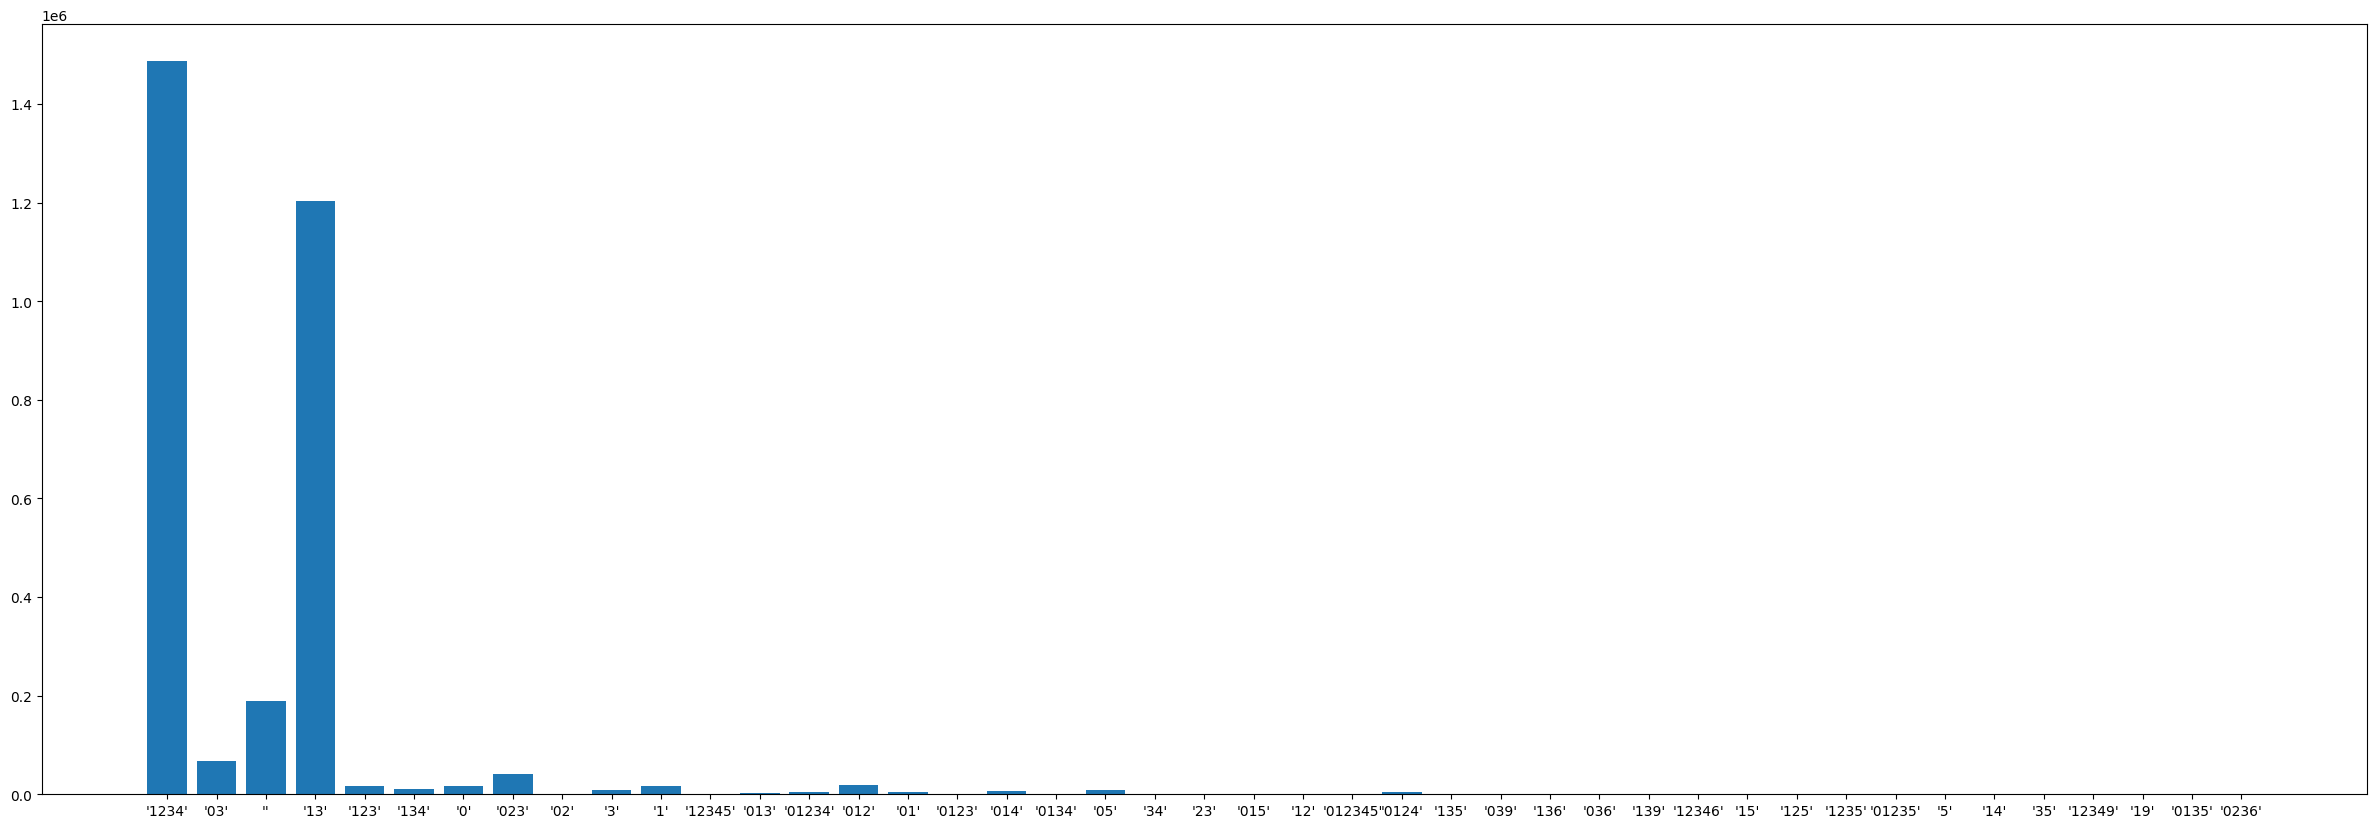

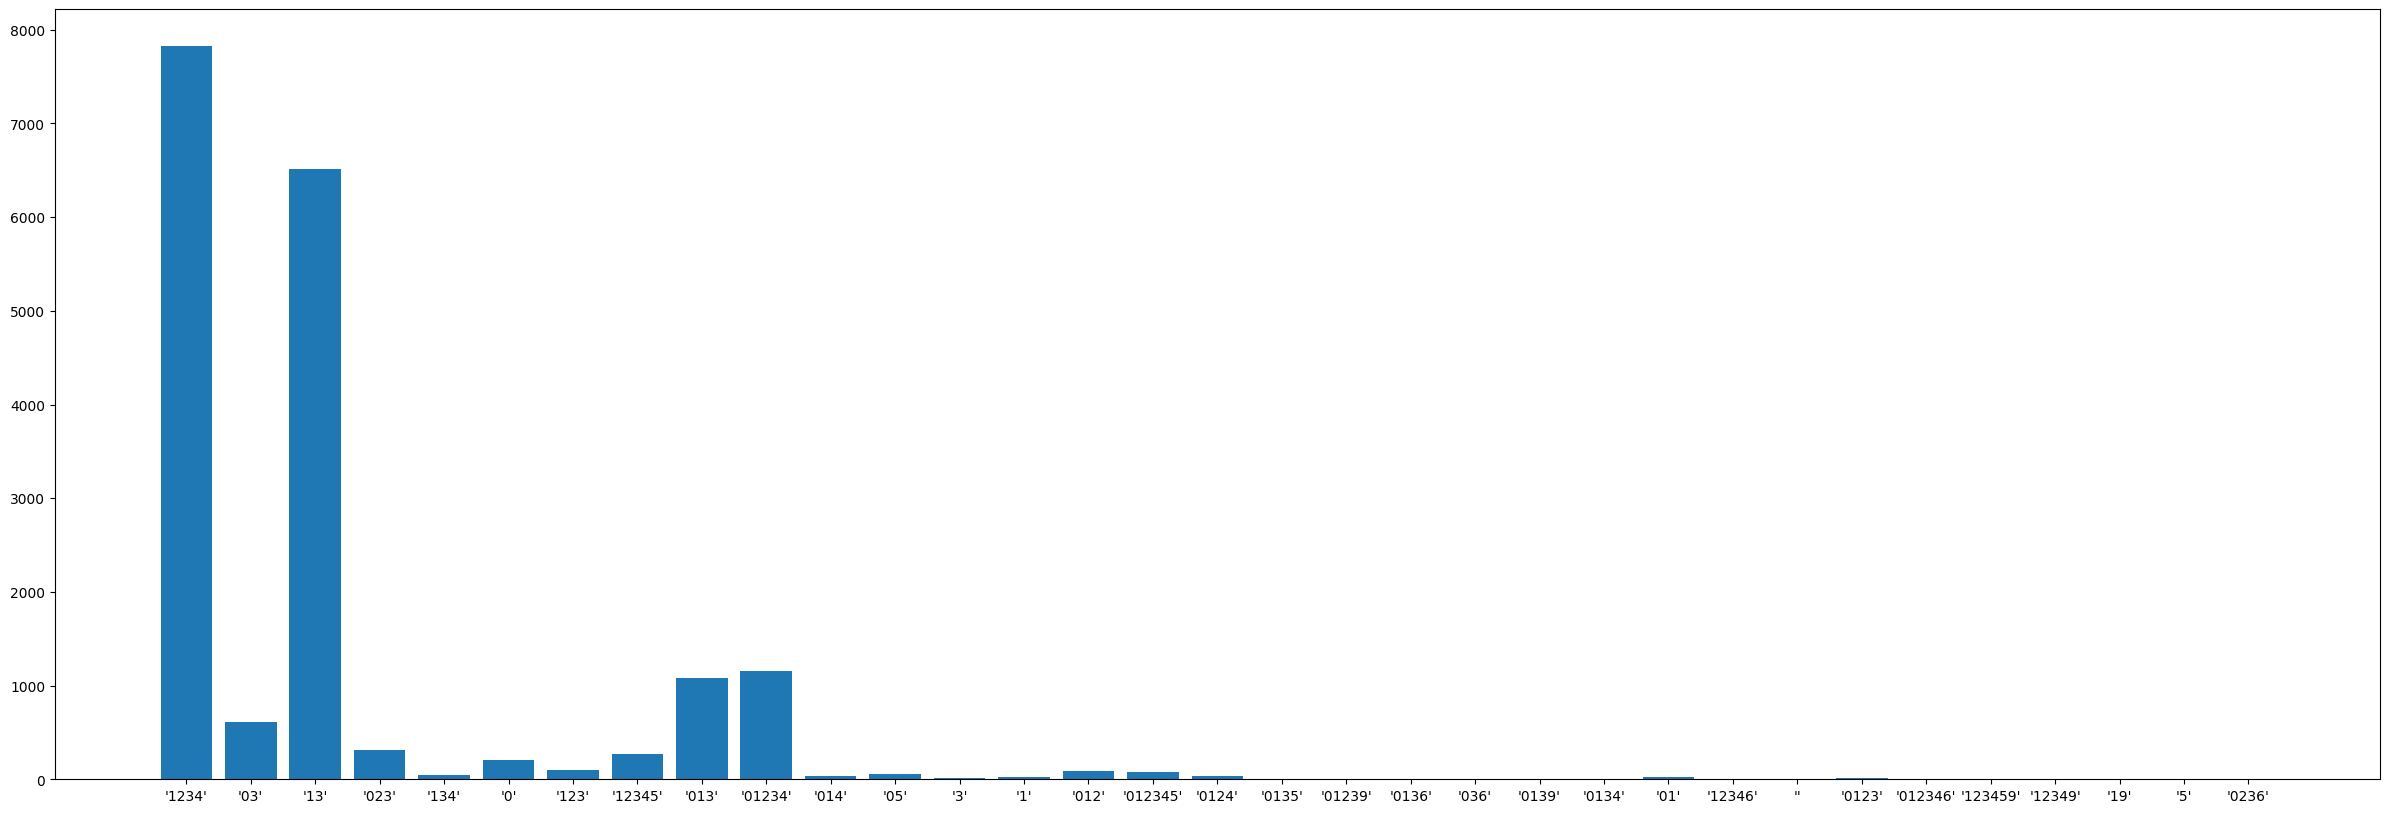

In [11]:
import json
import matplotlib.pyplot as plt

with open('processed_things_2023_11_24.json') as f:
    processed_things = json.load(f)
    
results_distribution = {}
results_distribution_things = {}
    
for thing_name, thing in processed_things.items():
    if thing["TotalCyclesCount"] == 0 or thing["TotalCyclesCount"] == thing['TotalRemovedCycleCount']:
        continue
    thing_colors = set()
    for day_idx in range(7):
        for hour_idx in range(24):
            for result in thing['Results'][day_idx][hour_idx]:
                thing_colors.add(result)
            results = thing['Results'][day_idx][hour_idx]
            sorted_results = sorted(results)
            results_string = ''.join(str(e) for e in sorted_results)
            string = "'" + results_string + "'"
            if string not in results_distribution:
                results_distribution[string] = 1
            else:
                results_distribution[string] += 1
    thing_colors_list = list(thing_colors)
    thing_colors_list.sort()
    thing_colors_string = ''.join(str(e) for e in thing_colors_list)
    string = "'" + thing_colors_string + "'"
    if string == "''":
        print(thing)
    if string not in results_distribution_things:
        results_distribution_things[string] = 1
    else:
        results_distribution_things[string] += 1
        
print("Results distribution")
print(results_distribution_things)
print("Total")
print(sum(results_distribution_things.values()))
print("1234 - relative")
print(results_distribution_things["'1234'"]/sum(results_distribution_things.values()))
print("13 - relative")
print(results_distribution_things["'13'"]/sum(results_distribution_things.values()))

fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(range(len(results_distribution)), list(results_distribution.values()), align='center')
ax.set_xticks(range(len(results_distribution)))
ax.set_xticklabels(list(results_distribution.keys()))
plt.show()

fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(range(len(results_distribution_things)), list(results_distribution_things.values()), align='center')
ax.set_xticks(range(len(results_distribution_things)))
ax.set_xticklabels(list(results_distribution_things.keys()))
plt.show()
                

In [3]:
import json

with open('processed_things_2023_11_24.json') as f:
    processed_things = json.load(f)
    
things_with_no_cycles = 0

for thing_name, thing in processed_things.items():
    if "_primary" in thing_name:
        if thing['TotalCyclesCount'] == 0:
            things_with_no_cycles += 1
        
print(things_with_no_cycles)
            


1835
